In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import time
import re

from sklearn.model_selection import train_test_split

print('Import Done!')

Import Done!


## Load Data

In [2]:
with tqdm() as bar:
    # do not skip any of the rows, but update the progress bar instead
    df = pd.read_csv('data/train.csv', skiprows=lambda x: bar.update(1) and False)

df.head()

26207it [00:00, 91361.73it/s] 


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
0,2012-01-15 23:40:09,True,False,Cosplayer/Fitness lover. Come to me https://t....,74,7,0,False,465096524,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9666745212...,reml5477,20,False,0.006,3138,1
1,2016-10-04 00:44:39,False,False,pobody’s nerfect,50443,164,590,True,783105517673648132,cy,she/her,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1281752126...,kinlibra,6469,False,4.572,1415,0
2,2009-05-23 04:04:13,False,False,gracias por participar 🏅,9394,208,189,False,41970759,es,La diaspora,http://abs.twimg.com/images/themes/theme17/bg.gif,http://pbs.twimg.com/profile_images/1233811596...,_delaualau,30296,False,7.378,4106,0
3,2009-05-17 04:31:31,False,False,Stand Up Comedian/Actor from North Philadelphi...,46,66180,1090,True,40607946,en,"Calabasas, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1184851104...,SpankHorton,164957,False,40.116,4112,0
4,2009-02-16 13:11:21,True,False,Assignment Editor at NBC10 and President of Ja...,1223,487,867,True,20983433,en,"Jenkintown, PA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5234863934...,javelinjt,1752,False,0.417,4201,0


## Train/Val/Test Split

The proportion of Train/Val/Test Split is:
<ul>
    <li>
        Train: 70%
    </li>
    <li>
        Val: 20%
    </li>
    <li>
        Test: 10%
    </li>
</ul>

In [3]:
X = df.drop('target', axis = 1) 
y = df['target']

In [4]:
# Initial split: 80% training, 20% validation & test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Second split: 10% validation, 10% test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1, stratify=y_temp)

## Exploratory Data Analysis

In [5]:
df_train = X_train.copy()
df_train['target'] = y_train

df_train.head()

,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,target
12800,2016-03-24 15:55:14,True,False,You'll turn out ordinary if you're not careful...,33315,317,360,True,713031428833828865,en,"Nebraska, USA",NaN,http://pbs.twimg.com/profile_images/8681274423...,midwesternlivin,3126,False,1.944,1608,0
24611,2013-04-19 21:47:49,False,False,NaN,4537,82,835,False,1365481327,NaN,España,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1066967277...,juanhmetal,3487,False,1.302,2678,0
25400,2009-03-10 20:45:17,False,False,Tenista/ Tennis player https://t.co/GFbv9Txek4...,273,1820590,125,True,23653153,en,"Florianópolis, Brasil",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1136630171...,gugakuerten,4443,True,1.063,4179,0
20148,2012-05-08 09:36:00,True,False,☼☾xvi // photography // ☽☼,76,27,0,False,574422621,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/5269345911...,tiffanylloyd018,204,False,0.067,3025,0
24284,2011-04-25 20:03:49,False,False,NaN,2906,135,0,False,287850643,NaN,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8045759682...,alexsimons2,13754,False,4.042,3403,1


In [6]:
# ====== DF Info ======
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20964 entries, 12800 to 10106
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   created_at                    20964 non-null  object 
 1   default_profile               20964 non-null  bool   
 2   default_profile_image         20964 non-null  bool   
 3   description                   16904 non-null  object 
 4   favourites_count              20964 non-null  int64  
 5   followers_count               20964 non-null  int64  
 6   friends_count                 20964 non-null  int64  
 7   geo_enabled                   20964 non-null  bool   
 8   id                            20964 non-null  int64  
 9   lang                          16506 non-null  object 
 10  location                      20962 non-null  object 
 11  profile_background_image_url  18371 non-null  object 
 12  profile_image_url             20963 non-null  object 
 13  sc

<b>df_train consists of the following columns:</b>
<ol>
    <li>
        <b>created_at</b>, The date and time when the Twitter account was created --> datetime object
    </li>
    <li>
        <b>default_profile</b>, Indicates whether the user has a default profile settings --> boolean T/F
    </li>
    <li>
        <b>default_profile_image</b>, Indicates whether the user has a default profile image --> boolean T/F
    </li>
    <li>
        <b>description</b>, The user's profile description or bio --> string object
    </li>
    <li>
        <b>favourites_count</b>, The number of tweets the user has liked --> integer
    </li>
    <li>
        <b>followers_count</b>, The number of followers the user has --> integer
    </li>
    <li>
        <b>friends_count</b>, The number of accounts the user is following --> integer
    </li>
    <li>
        <b>geo_enabled</b>, Indicates whether the user has enabled location services --> boolean T/F
    </li>
    <li>
        <b>id</b>, The unique identifier for the Twitter account --> integer
    </li>
    <li>
        <b>lang</b>, The language preference set for the account --> string / category object
    </li>
    <li>
        <b>location</b>, The location information provided by the user --> string object
    </li>
    <li>
        <b>profile_background_image_url</b>, URL of the user's profile background image --> string object
    </li>
    <li>
        <b>profile_image_url</b>, URL of the user's profile image --> string object
    </li>
    <li>
        <b>screen_name</b>, The user's Twitter handle or username --> string object
    </li>
    <li>
        <b>statuses_count</b>, The total number of tweets posted by the user --> integer
    </li>
    <li>
        <b>verified</b>, Indicates whether the account is verified by Twitter --> boolean T/F
    </li>
    <li>
        <b>average_tweets_per_day</b>, The average number of tweets posted per day --> decimal float
    </li>
    <li>
        <b>account_age_days</b>, The age of the account in days --> integer
    </li>
    <li>
        <b>target</b>, The classification label indicating whether the account is a bot or not --> boolean 0/1 
    </li>
</ol>

In [7]:
# ====== checking null values ========
df_train.isnull().sum()
# found some empty values in: description, lang, profile_background_image_url, profile_image_url, location

created_at                         0
default_profile                    0
default_profile_image              0
description                     4060
favourites_count                   0
followers_count                    0
friends_count                      0
geo_enabled                        0
id                                 0
lang                            4458
location                           2
profile_background_image_url    2593
profile_image_url                  1
screen_name                        0
statuses_count                     0
verified                           0
average_tweets_per_day             0
account_age_days                   0
target                             0
dtype: int64

### 1) created_at

In [8]:
df_train['created_at'] = pd.to_datetime(df_train['created_at']) # convert to date time

In [9]:
df_train['created_at'].describe() # this dataset consist of user data created between 2006 and 2019

count                            20964
mean     2012-05-14 07:34:03.905266176
min                2006-07-13 09:05:49
25%      2009-12-18 20:29:25.750000128
50%                2011-10-27 22:40:25
75%                2014-04-29 20:37:29
max                2019-04-24 08:53:21
Name: created_at, dtype: object

In [10]:
df_train[df_train['target'] == 1][['created_at', 'target']].head(20)

,created_at,target
24284,2011-04-25 20:03:49,1
2770,2011-02-16 00:33:15,1
3711,2010-06-07 02:22:50,1
2085,2014-11-18 01:03:07,1
10098,2009-07-09 03:26:39,1
21780,2016-03-31 07:43:38,1
8381,2011-01-29 18:03:10,1
364,2013-10-16 03:49:08,1
9110,2010-08-31 13:49:33,1
18786,2017-06-21 10:52:37,1


In [11]:
df_train[df_train['target'] == 0][['created_at', 'target']].head(20)

,created_at,target
12800,2016-03-24 15:55:14,0
24611,2013-04-19 21:47:49,0
25400,2009-03-10 20:45:17,0
20148,2012-05-08 09:36:00,0
22592,2008-05-16 00:19:29,0
2101,2009-04-01 22:20:30,0
1029,2016-05-19 23:36:50,0
6117,2017-02-03 23:09:48,0
2913,2012-05-09 20:19:43,0
15398,2009-08-18 18:18:54,0


No futher transformation will be done for column `created_at` individually, there is no pattern between bot and non-bot in this column

### 2) default_profile

In [12]:
df_train['default_profile'] = df_train['default_profile'].astype(bool) # convert to boolean, if not done

In [13]:
df_train['default_profile'].value_counts()

default_profile
False    12145
True      8819
Name: count, dtype: int64

In [14]:
n_rows = df_train.shape[0]
n_bots = df_train['target'].sum()

print("Total rows:", n_rows)
print()
print("Number of bots captured on default profile settings:", df_train[df_train['default_profile'] == True]['target'].sum())
print("Number of bots captured on non-default profile settings:", df_train[df_train['default_profile'] == False]['target'].sum())
print()
print("Number of real user captured on default profile settings:", n_rows - df_train[df_train['default_profile'] == True]['target'].sum())
print("Number of real user captured on non-default profile settings:", n_rows - df_train[df_train['default_profile'] == False]['target'].sum())
print()
print('%.3f%% of the bots captured on default profile settings' % (df_train[df_train['default_profile'] == True]['target'].sum()/n_bots*100))

Total rows: 20964

Number of bots captured on default profile settings: 4388
Number of bots captured on non-default profile settings: 2638

Number of real user captured on default profile settings: 16576
Number of real user captured on non-default profile settings: 18326

62.454% of the bots captured on default profile settings


### 3) default_profile_image

In [15]:
df_train['default_profile_image'] = df_train['default_profile_image'].astype(bool) # convert to boolean, if not done

In [16]:
df_train['default_profile_image'].value_counts() 

default_profile_image
False    20661
True       303
Name: count, dtype: int64

In [17]:
n_rows = df_train.shape[0]
n_bots = df_train['target'].sum()

print("Total rows:", n_rows)
print()
print("Number of bots captured on default profile image:", df_train[df_train['default_profile_image'] == True]['target'].sum())
print("Number of bots captured on non-default profile image:", df_train[df_train['default_profile_image'] == False]['target'].sum())
print()
print("Number of real user captured on default profile image:", n_rows - df_train[df_train['default_profile_image'] == True]['target'].sum())
print("Number of real user captured on non-default profile image:", n_rows - df_train[df_train['default_profile_image'] == False]['target'].sum())
print()
print('%.3f%% of the bots captured on default profile image' % (df_train[df_train['default_profile_image'] == True]['target'].sum()/n_bots*100))

Total rows: 20964

Number of bots captured on default profile image: 212
Number of bots captured on non-default profile image: 6814

Number of real user captured on default profile image: 20752
Number of real user captured on non-default profile image: 14150

3.017% of the bots captured on default profile image


### 4) description

### 5) favourites_count

In [18]:
df_train['favourites_count'] = df_train['favourites_count'].astype(int) # convert to int, if not done

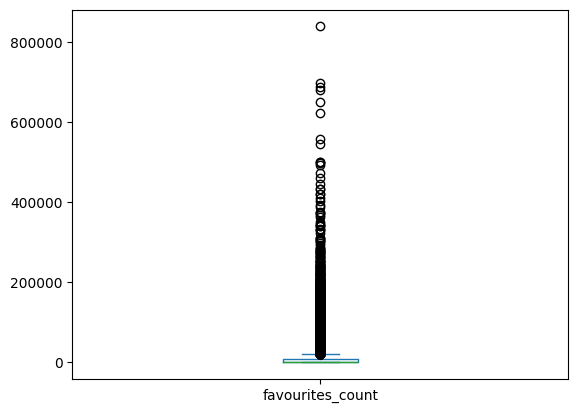

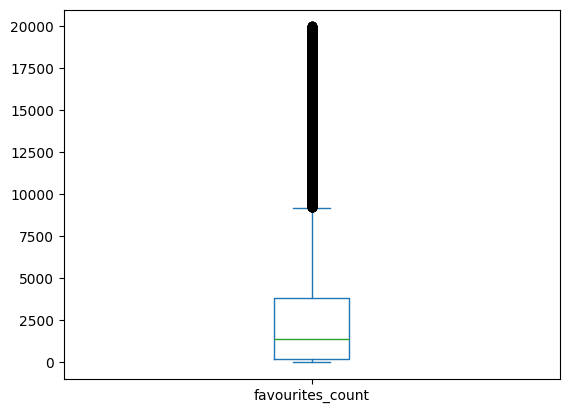

In [19]:
df_train['favourites_count'].plot(kind='box')
plt.show()

df_train[df_train['favourites_count'] < 20000]['favourites_count'].plot(kind='box')
plt.show() # the data is right skewed

In [20]:
df_train[df_train['target'] == 1]['favourites_count'].describe() # bots relatively has lower favourites count

count      7026.000000
mean       4349.146456
std       23776.743466
min           0.000000
25%         130.000000
50%        1109.500000
75%        2226.750000
max      839929.000000
Name: favourites_count, dtype: float64

In [21]:
df_train[df_train['target'] == 0]['favourites_count'].describe()

count     13938.000000
mean      16007.601234
std       36827.903409
min           0.000000
25%         651.250000
50%        3569.500000
75%       15024.500000
max      697525.000000
Name: favourites_count, dtype: float64

<Axes: ylabel='favourites_count'>

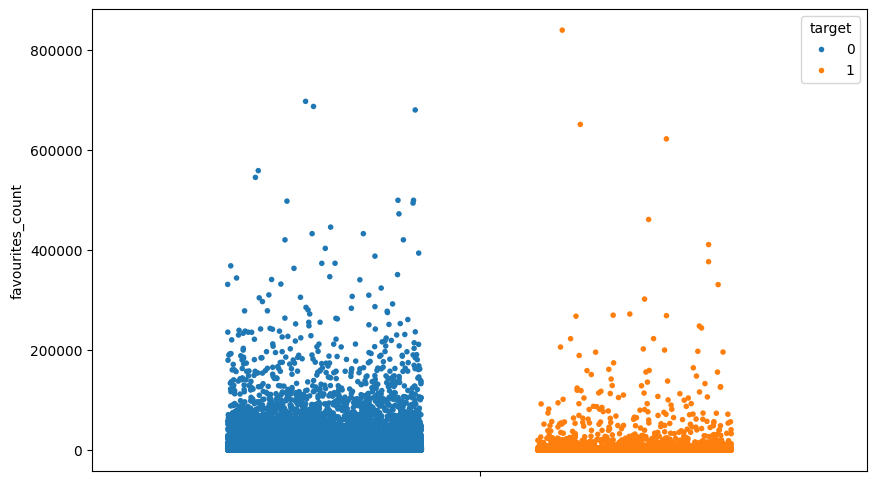

In [22]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_train,
    y='favourites_count',
    hue='target',
    dodge=True,
    jitter=0.25,
    size=4
)

Bots relatively has lower `favourites_count` than real user, but not really a good feature if solely rely on this column. Feature cross is probably needed. <br/> Furthermore, the values of `favourites_count` is right skewed and need to be transformed (e.g. with log transformed).

### 6) followers_count

In [23]:
df_train['followers_count'] = df_train['followers_count'].astype(int) # convert to int, if not done

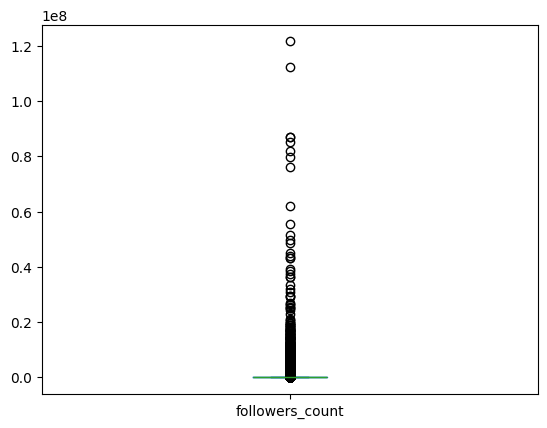

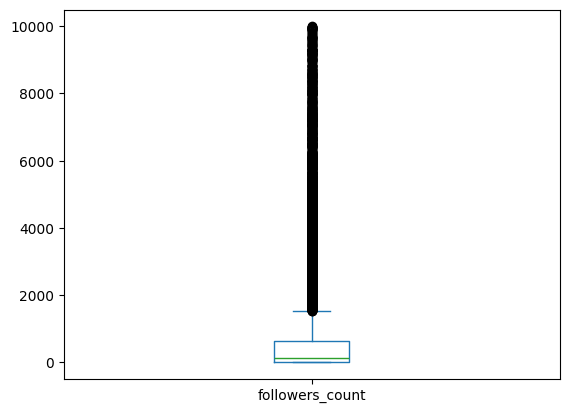

In [24]:
df_train['followers_count'].plot(kind='box')
plt.show()

df_train[df_train['followers_count'] < 10000]['followers_count'].plot(kind='box')
plt.show() # the data is right skewed

In [25]:
df_train[df_train['target'] == 1]['followers_count'].describe()

count    7.026000e+03
mean     7.496559e+04
std      1.074677e+06
min      0.000000e+00
25%      8.000000e+00
50%      2.500000e+01
75%      1.967500e+02
max      4.955794e+07
Name: followers_count, dtype: float64

In [26]:
df_train[df_train['target'] == 0]['followers_count'].describe()

count    1.393800e+04
mean     5.388496e+05
std      3.082214e+06
min      0.000000e+00
25%      1.800000e+02
50%      1.020500e+03
75%      7.525700e+04
max      1.216415e+08
Name: followers_count, dtype: float64

<Axes: ylabel='followers_count'>

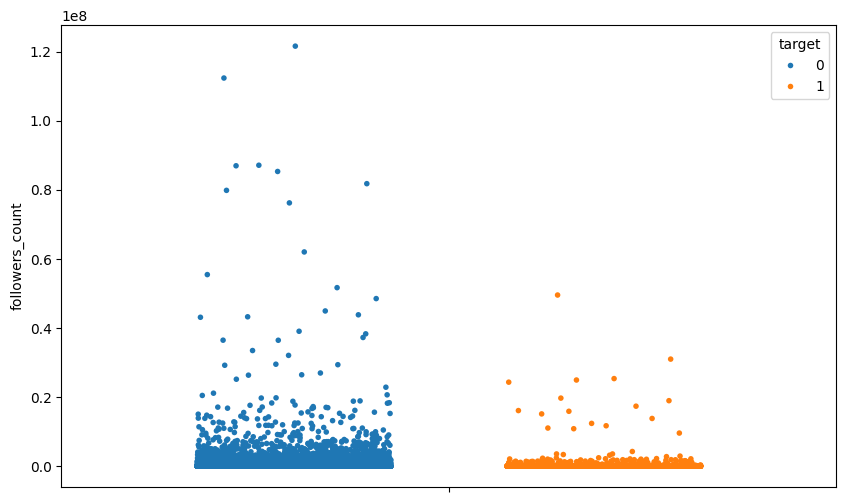

In [27]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_train,
    y='followers_count',
    hue='target',
    dodge=True,
    jitter=0.25,
    size=4
)

Bots relatively has lower `followers_count` than real user, but not really a good feature if solely rely on this column. Feature cross is probably needed. <br/> Furthermore, the values of `followers_count` is right skewed and need to be transformed (e.g. with log transformed).

### 7) friends_count

In [28]:
df_train['friends_count'] = df_train['friends_count'].astype(int) # convert to int, if not done

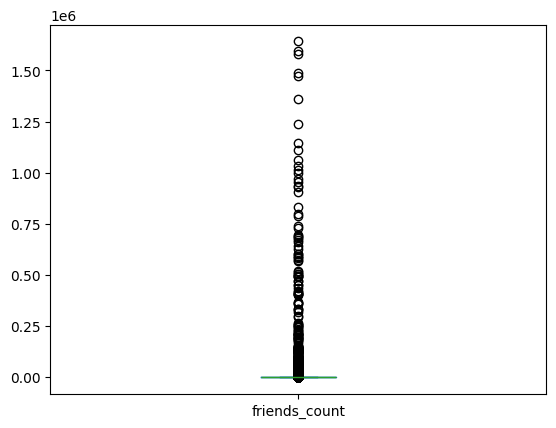

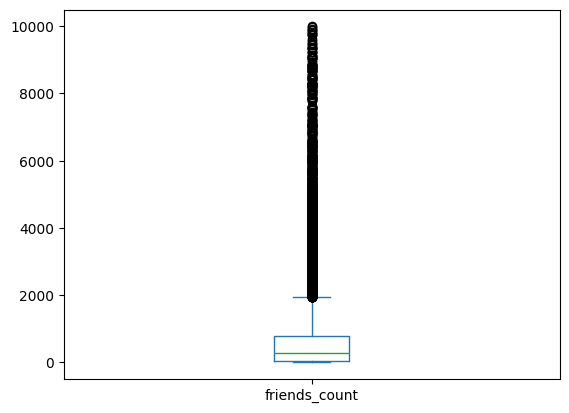

In [29]:
df_train['friends_count'].plot(kind='box')
plt.show()

df_train[df_train['friends_count'] < 10000]['friends_count'].plot(kind='box')
plt.show() # the data is right skewed

In [30]:
df_train[df_train['target'] == 1]['friends_count'].describe()

count    7.026000e+03
mean     4.746586e+03
std      4.821320e+04
min      0.000000e+00
25%      0.000000e+00
50%      2.900000e+01
75%      2.550000e+02
max      1.473166e+06
Name: friends_count, dtype: float64

In [31]:
df_train[df_train['target'] == 0]['friends_count'].describe()

count    1.393800e+04
mean     4.148421e+03
std      4.443670e+04
min      0.000000e+00
25%      1.700000e+02
50%      4.650000e+02
75%      1.116000e+03
max      1.641962e+06
Name: friends_count, dtype: float64

<Axes: ylabel='friends_count'>

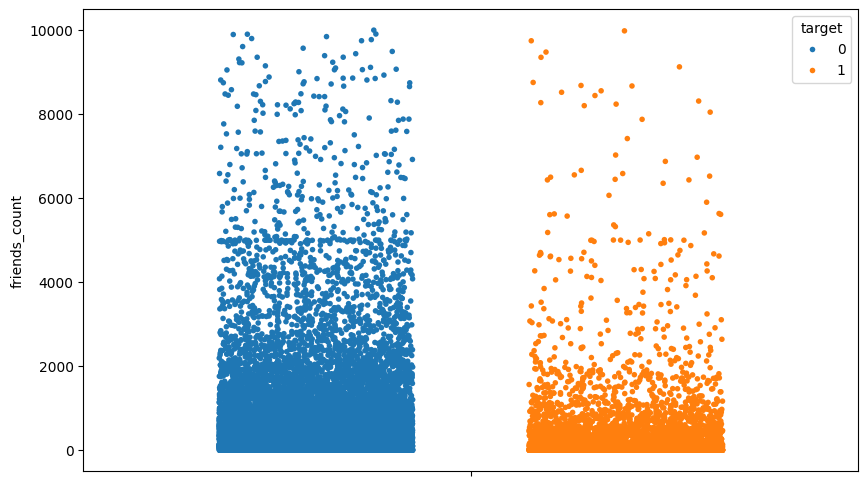

In [32]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=df_train[df_train['friends_count']< 10000],
    y='friends_count',
    hue='target',
    dodge=True,
    jitter=0.25,
    size=4
)

Bots relatively has lower `friends_count` than real user, but not really a good feature if solely rely on this column. Feature cross is probably needed. <br/> Furthermore, the values of `friends_count` is right skewed and need to be transformed (e.g. with log transformed).

### 8) geo_enabled

In [33]:
df_train['geo_enabled'] = df_train['geo_enabled'].astype(bool) # convert to boolean, if not done

In [34]:
df_train['geo_enabled'].value_counts()

geo_enabled
False    11530
True      9434
Name: count, dtype: int64

In [35]:
n_rows = df_train.shape[0]
n_bots = df_train['target'].sum()

print("Total rows:", n_rows)
print()
print("Number of bots captured has enabled location services:", df_train[df_train['geo_enabled'] == True]['target'].sum())
print("Number of bots captured has not enabled location services:", df_train[df_train['geo_enabled'] == False]['target'].sum())
print()
print("Number of real user captured has enabled location services:", n_rows - df_train[df_train['geo_enabled'] == True]['target'].sum())
print("Number of real user captured has not enabled location services:", n_rows - df_train[df_train['geo_enabled'] == False]['target'].sum())
print()
print('%.3f%% of the bots captured has enabled location services' % (df_train[df_train['geo_enabled'] == True]['target'].sum()/n_bots*100))

Total rows: 20964

Number of bots captured has enabled location services: 1476
Number of bots captured has not enabled location services: 5550

Number of real user captured has enabled location services: 19488
Number of real user captured has not enabled location services: 15414

21.008% of the bots captured has enabled location services


### 9) id

In [36]:
df_train['id'].value_counts()

id
713031428833828865    1
1365481327            1
23653153              1
574422621             1
287850643             1
                     ..
1427001162            1
256597786             1
835545088373604352    1
198013804             1
94348985              1
Name: count, Length: 20964, dtype: int64

Since all values in feature `id` are unique, therefore this feature will be dropped and will not be used for model prediction. 

### 10) lang

In [37]:
print("num of unknown values:", df_train['lang'].isnull().sum())

df_train['lang'] = df_train['lang'].fillna('na')
print("num of unknown values:", df_train['lang'].isnull().sum())

num of unknown values: 4458
num of unknown values: 0


In [38]:
df_train['lang'] = df_train['lang'].astype('category')
df_train['lang'].value_counts() # lots of small values

lang
en       11976
na        4458
es         659
pt         395
it         358
ar         341
de         308
fr         238
ja         212
af         189
id         173
ru         142
tl         122
tr         121
sw         111
ca         105
da          92
no          92
cy          90
nl          86
ro          82
sv          69
so          68
zh-cn       58
ko          57
et          52
fi          43
vi          34
pl          34
sl          26
hr          24
hu          20
lt          19
sk          18
sq          15
th          14
el          12
bg           9
fa           8
mk           7
uk           6
cs           5
hi           5
ur           3
lv           3
zh-tw        2
he           1
pa           1
ne           1
Name: count, dtype: int64

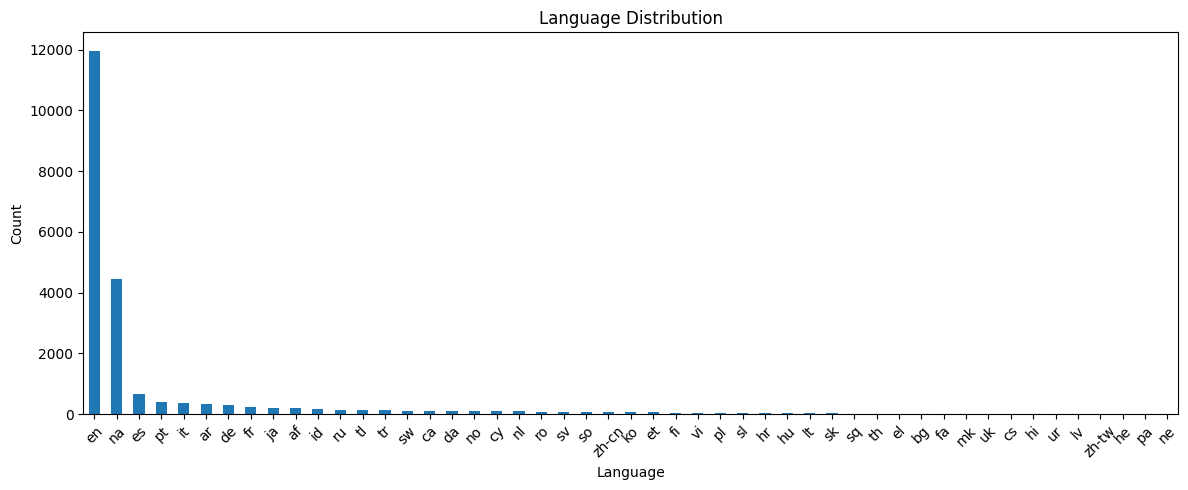

In [39]:
df_train['lang'].value_counts().plot(kind='bar', figsize=(12, 5))
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [40]:
df_train[df_train['target'] == 0]['lang'].value_counts()

lang
en       9007
na       1951
es        495
pt        278
it        261
de        234
fr        178
ru        129
ar        118
id        112
ja        110
tl         93
ca         86
tr         78
da         71
af         67
ro         67
nl         66
no         66
sv         53
cy         49
so         42
sw         39
et         37
fi         26
vi         25
pl         23
hr         21
hu         19
ko         19
lt         16
sl         15
sk         12
sq         12
zh-cn      11
th         10
bg          8
mk          7
uk          6
cs          5
el          5
fa          3
lv          3
hi          2
he          1
ur          1
ne          1
pa          0
zh-tw       0
Name: count, dtype: int64

In [41]:
df_train[df_train['target'] == 1]['lang'].value_counts()

lang
en       2969
na       2507
ar        223
es        164
af        122
pt        117
ja        102
it         97
de         74
sw         72
id         61
fr         60
zh-cn      47
tr         43
cy         41
ko         38
tl         29
no         26
so         26
da         21
nl         20
ca         19
fi         17
sv         16
et         15
ro         15
ru         13
sl         11
pl         11
vi          9
el          7
sk          6
fa          5
th          4
sq          3
lt          3
hi          3
hr          3
zh-tw       2
ur          2
bg          1
hu          1
pa          1
he          0
cs          0
mk          0
ne          0
lv          0
uk          0
Name: count, dtype: int64

In feature `lang` exists languages in small values, will be bucketized as part of preprocessing. Interestingly, more than 50% of na value (language preference was not indicated) are bots.

### 11) location

In [42]:
df_train['location'].value_counts()

location
unknown                      7390
Los Angeles, CA               297
New York, NY                  192
United States                 142
Los Angeles                   125
                             ... 
At the crib dog                 1
SEEKING SALVATION               1
Never touching the ground       1
Granada Hills, CA               1
20 | she/her | lesbian          1
Name: count, Length: 7349, dtype: int64

In [43]:
print("num of unknown values:", df_train['location'].isnull().sum())

df_train['location'] = df_train['location'].fillna('unknown') # fill with unknown values as 'unknown'
print("num of unknown values:", df_train['location'].isnull().sum())

num of unknown values: 2
num of unknown values: 0


In [44]:
df_train[df_train['target'] == 1]['location'].value_counts()

location
unknown            3577
Los Angeles, CA      25
New York, NY         22
United States        21
Brasil               19
                   ... 
Muskegon, MI          1
Harrisburg            1
West Carson, CA       1
서핑벨벳                  1
NEW YORK              1
Name: count, Length: 2447, dtype: int64

In [45]:
df_train[df_train['target'] == 0]['location'].value_counts()

location
unknown             3815
Los Angeles, CA      272
New York, NY         170
United States        121
Los Angeles          114
                    ... 
avex-management.       1
Beirut- Lebanon        1
Venezuela†             1
nyc/seoul              1
Hereford, TX           1
Name: count, Length: 5439, dtype: int64

### 12) profile_background_image_url

In [46]:
df_train['profile_background_image_url'].value_counts()

profile_background_image_url
http://abs.twimg.com/images/themes/theme1/bg.png     12115
http://abs.twimg.com/images/themes/theme14/bg.gif     1266
http://abs.twimg.com/images/themes/theme9/bg.gif       940
http://abs.twimg.com/images/themes/theme10/bg.gif      528
http://abs.twimg.com/images/themes/theme15/bg.png      478
http://abs.twimg.com/images/themes/theme4/bg.gif       389
http://abs.twimg.com/images/themes/theme18/bg.gif      331
http://abs.twimg.com/images/themes/theme5/bg.gif       328
http://abs.twimg.com/images/themes/theme11/bg.gif      291
http://abs.twimg.com/images/themes/theme7/bg.gif       202
http://abs.twimg.com/images/themes/theme6/bg.gif       194
http://abs.twimg.com/images/themes/theme13/bg.gif      185
http://abs.twimg.com/images/themes/theme2/bg.gif       185
http://abs.twimg.com/images/themes/theme17/bg.gif      171
http://abs.twimg.com/images/themes/theme3/bg.gif       170
http://abs.twimg.com/images/themes/theme19/bg.gif      164
http://abs.twimg.com/images

In [47]:
print("num of unknown values:", df_train['profile_background_image_url'].isnull().sum())

df_train['profile_background_image_url'] = df_train['profile_background_image_url'].fillna('na') # fill with unknown values as 'unknown'
print("num of unknown values:", df_train['profile_background_image_url'].isnull().sum())

num of unknown values: 2593
num of unknown values: 0


In [48]:
df_train[df_train['target']==1]['profile_background_image_url'].value_counts()

profile_background_image_url
http://abs.twimg.com/images/themes/theme1/bg.png     4580
na                                                   1252
http://abs.twimg.com/images/themes/theme14/bg.gif     217
http://abs.twimg.com/images/themes/theme9/bg.gif      154
http://abs.twimg.com/images/themes/theme10/bg.gif     115
http://abs.twimg.com/images/themes/theme4/bg.gif       98
http://abs.twimg.com/images/themes/theme15/bg.png      78
http://abs.twimg.com/images/themes/theme18/bg.gif      70
http://abs.twimg.com/images/themes/theme5/bg.gif       70
http://abs.twimg.com/images/themes/theme11/bg.gif      56
http://abs.twimg.com/images/themes/theme13/bg.gif      43
http://abs.twimg.com/images/themes/theme7/bg.gif       37
http://abs.twimg.com/images/themes/theme19/bg.gif      36
http://abs.twimg.com/images/themes/theme6/bg.gif       36
http://abs.twimg.com/images/themes/theme2/bg.gif       34
http://abs.twimg.com/images/themes/theme12/bg.gif      32
http://abs.twimg.com/images/themes/theme3/b

In [49]:
df_train[df_train['target']==0]['profile_background_image_url'].value_counts()

profile_background_image_url
http://abs.twimg.com/images/themes/theme1/bg.png     7535
na                                                   1341
http://abs.twimg.com/images/themes/theme14/bg.gif    1049
http://abs.twimg.com/images/themes/theme9/bg.gif      786
http://abs.twimg.com/images/themes/theme10/bg.gif     413
http://abs.twimg.com/images/themes/theme15/bg.png     400
http://abs.twimg.com/images/themes/theme4/bg.gif      291
http://abs.twimg.com/images/themes/theme18/bg.gif     261
http://abs.twimg.com/images/themes/theme5/bg.gif      258
http://abs.twimg.com/images/themes/theme11/bg.gif     235
http://abs.twimg.com/images/themes/theme7/bg.gif      165
http://abs.twimg.com/images/themes/theme6/bg.gif      158
http://abs.twimg.com/images/themes/theme2/bg.gif      151
http://abs.twimg.com/images/themes/theme17/bg.gif     146
http://abs.twimg.com/images/themes/theme13/bg.gif     142
http://abs.twimg.com/images/themes/theme3/bg.gif      139
http://abs.twimg.com/images/themes/theme19/

### 13) profile_image_url

In [50]:
df_train['profile_image_url'].value_counts()

profile_image_url
http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    303
http://pbs.twimg.com/profile_images/1284326929873723395/Pv6iTm0Q_normal.jpg        1
http://pbs.twimg.com/profile_images/871204917385375744/sasyVV_M_normal.jpg         1
http://pbs.twimg.com/profile_images/1144679115221536768/NatXEY3i_normal.jpg        1
http://pbs.twimg.com/profile_images/1253867407774384129/RZ682LQY_normal.jpg        1
                                                                                ... 
http://pbs.twimg.com/profile_images/968010930796756992/15mgqPbD_normal.jpg         1
http://pbs.twimg.com/profile_images/476537671234228224/fb3p542t_normal.jpeg        1
http://pbs.twimg.com/profile_images/817716640141942785/QSVnvT4L_normal.jpg         1
http://pbs.twimg.com/profile_images/975627376506867712/1ptMiKR9_normal.jpg         1
http://pbs.twimg.com/profile_images/750184930617864192/WFeTh42I_normal.jpg         1
Name: count, Length: 20661, dtype: int64

In [51]:
print("num of unknown values:", df_train['profile_image_url'].isnull().sum())

df_train['profile_image_url'] = df_train['profile_image_url'].fillna(df_train['profile_image_url'].mode()[0]) # fill with unknown values as 'unknown'

print("num of unknown values:", df_train['profile_image_url'].isnull().sum())

num of unknown values: 1
num of unknown values: 0


In [52]:
df_train[df_train['target']==1]['profile_image_url'].value_counts()

profile_image_url
http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    213
http://pbs.twimg.com/profile_images/1758245984/879_normal.jpg                      1
http://pbs.twimg.com/profile_images/2581398856/stilettos_normal.jpg                1
http://pbs.twimg.com/profile_images/804943923919646720/9JoGqHoA_normal.jpg         1
http://pbs.twimg.com/profile_images/854850230528991233/MkoL8fQ5_normal.jpg         1
                                                                                ... 
http://pbs.twimg.com/profile_images/776782303355932672/j3ADud9H_normal.jpg         1
http://pbs.twimg.com/profile_images/1278301735216467969/kjHCqtyJ_normal.jpg        1
http://pbs.twimg.com/profile_images/879512593450381313/pmheoZ3U_normal.jpg         1
http://pbs.twimg.com/profile_images/1290489159849619458/EVhR4fEs_normal.jpg        1
http://pbs.twimg.com/profile_images/877803132830584833/k2-BNc_V_normal.jpg         1
Name: count, Length: 6814, dtype: int64

In [53]:
df_train[df_train['target']==0]['profile_image_url'].value_counts()

profile_image_url
http://abs.twimg.com/sticky/default_profile_images/default_profile_normal.png    91
http://pbs.twimg.com/profile_images/1029964211236024321/gxKwNoUj_normal.jpg       1
http://pbs.twimg.com/profile_images/1027933141745520640/QbrGR7RG_normal.jpg       1
http://pbs.twimg.com/profile_images/1250999856451121158/nuyYXw1q_normal.jpg       1
http://pbs.twimg.com/profile_images/949790871771320320/WZ102KQr_normal.jpg        1
                                                                                 ..
http://pbs.twimg.com/profile_images/1294495165751742466/YgOVCX7b_normal.jpg       1
http://pbs.twimg.com/profile_images/892699620727554049/g5CVgANz_normal.jpg        1
http://pbs.twimg.com/profile_images/661252831337439232/EqxzNjvu_normal.jpg        1
http://pbs.twimg.com/profile_images/537380898321494016/tnxs8nai_normal.jpeg       1
http://pbs.twimg.com/profile_images/1244250020678942720/Y4mGqDoO_normal.jpg       1
Name: count, Length: 13848, dtype: int64

Some of the bots uses default profile picture in feature `profile_image_url`. However, need to perform feature cross for better prediction.

### 14) screen_name

In [54]:
df_train['screen_name'].value_counts()

screen_name
midwesternlivin    1
juanhmetal         1
gugakuerten        1
tiffanylloyd018    1
alexsimons2        1
                  ..
NevaehStarlee      1
d0nhy0n            1
zeel1314           1
21h32              1
TeessideJon        1
Name: count, Length: 20964, dtype: int64

In [55]:
df_train[df_train['target']==1]['screen_name'].unique()

array(['alexsimons2', 'CocaCola_Korea', 'coinhealth1', ..., 'd0nhy0n',
       'zeel1314', 'TeessideJon'], shape=(7026,), dtype=object)

In [56]:
df_train[df_train['target']==0]['screen_name'].unique()

array(['midwesternlivin', 'juanhmetal', 'gugakuerten', ..., 'Nom13',
       'ceonyc', '21h32'], shape=(13938,), dtype=object)

In [57]:
df_train[df_train['target']==1]['screen_name'].unique().tolist()

['alexsimons2',
 'CocaCola_Korea',
 'coinhealth1',
 'Johnquigley24',
 'Luna_Tix',
 'augurelt',
 'sheharyar1234',
 'DerekChinLi',
 'A___sakush07',
 'ubezivttspqpf11',
 'officialzanardi',
 'InfoSecHotSpot',
 'lamara_zhdanova',
 'jnkfoodjnkie',
 'Cam4',
 'ialexanderwu',
 'eriolroy',
 'Gretsnig',
 'mittifrae',
 'savukinass',
 'harmonywhispers',
 'taylorparker97',
 'rlherschy',
 'RoyalVietNam',
 'Jenni4597',
 'guhaimin',
 'Sumforall',
 'MGVishnu',
 'khergert',
 'elizargolubev',
 'weekinpharma',
 'jfredysrivas',
 'okimaul93976242',
 'arghhhhh12',
 'BryanKilvinski',
 'Snapronni',
 'Xaviersawake',
 'daiwei08',
 'bautistalouis7',
 'Za_17w',
 'rointy',
 'GO1fXFAv7ZuMSYG',
 'MovieProducer7',
 'stqswkijzcp2745',
 'LorriesYeung',
 'sandinojones',
 'larson_cardwell',
 'ActSciBot',
 'seopinkvelvet',
 'anna_mohney',
 'Hendy42',
 'I080066',
 'xy8539158',
 'antonartdb',
 'hailingvigilant',
 'abovdainfluence',
 'ohthick',
 'findyourreps',
 'sarahzhou4',
 'almetaposchet21',
 '0gn',
 'among_stars_',
 'Trev

In [58]:
mask = df_train[df_train['target'] == 1]['screen_name'].str.contains(r'bot', case=False, na=False)
count_bot_users = mask.sum()

print(f"Number of users with 'bot' in screen_name (target == 1): {count_bot_users}")
df_train[(df_train['target'] == 1)&(df_train['screen_name'].str.contains(r'bot', case=False, na=False))]['screen_name'].tolist()

Number of users with 'bot' in screen_name (target == 1): 149


['ActSciBot',
 'Gobbobot',
 'iembot_tbw',
 'WhosThatPokebot',
 'aerith_bot_',
 'i7promptbot',
 'dramadevil_bot',
 'botmakingart',
 'three_shape_bot',
 'PBothnerMusic',
 'birdbot4',
 'paintnumbersbot',
 'Smoothiebot',
 'PixelMonsterBot',
 'artassignbot',
 'WritersBlockBot',
 'Sunlight_Bot',
 'AndromedaBot',
 'Rothko_Bot',
 'dayofweek_bot',
 'KeplerBot',
 'resenhabot',
 'CultureShip_bot',
 'DadaistBot',
 'littlebubbot',
 'TorfsBot',
 'EmojiMoodBot',
 'So_YouBotDetntn',
 'botifyouagree',
 'botcocktails',
 'notyourbot1',
 'ReadMeLikeABot',
 'NotAWaterBottle',
 'newspaperbot',
 '3DHYoBoTlotMyaG',
 'spacetravelbot',
 'BrundageBot',
 'bot_sisoku',
 'Kiba_horse_bot',
 'PrettyBirdsBot',
 'hypno__bot',
 'nhcbot',
 'yourwindowbot',
 'pico8bot',
 'BikeDTLABot',
 'anthrobotica',
 'TonightWeBot',
 'a_painting_bot',
 'YouLookNiceBot',
 'HalloSpacebot',
 'menubot',
 'BackToWorkBot',
 'bot_teleport',
 'insectsbot',
 'thelockbot',
 'folkloricbot',
 'EmojiLoveBot',
 '_AARON_bot',
 'cityatnightbot',
 'eec

Some of the bot contains the word 'bot' in their `screen_name`

### 15) statuses_count

### 16) verified

### 17) average_tweets_per_day

### 18) account_age_days